In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# ignore imputation warnings from pymc
# ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
import warnings
from pymc import ImputationWarning

warnings.filterwarnings("ignore", category=ImputationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
from birdcall_distribution.data import prepare_dataframe

prep_df, W = prepare_dataframe(
    "../data/ee_v3_western_us_2.parquet",
    "../data/raw/birdclef-2022/train_metadata.csv",
    n_species=3,
)

In [4]:
from birdcall_distribution import model
import pymc as pm
import arviz as az

# display function
from IPython.display import display

models = {
    "varying_intercept_model": model.make_varying_intercept_model,
    "pooled_intercept_pooled_covariate_model": model.make_pooled_intercept_pooled_covariate_model,
    "pooled_intercept_varying_covariate_model": model.make_pooled_intercept_varying_covariate_model,
    "varying_intercept_pooled_covariate_model": model.make_varying_intercept_pooled_covariate_model,
    "varying_intercept_varying_covariate_model": model.make_varying_intercept_varying_covariate_model,
    "varying_intercept_car_model": model.make_varying_intercept_car_model,
    "pooled_intercept_car_model": model.make_pooled_intercept_car_model,
    "pooled_intercept_varying_covariate_car_model": model.make_pooled_intercept_varying_covariate_car_model,
    "varying_intercept_pooled_covariate_car_model": model.make_varying_intercept_pooled_covariate_car_model,
    "varying_intercept_varying_covariate_car_model": model.make_varying_intercept_varying_covariate_car_model,
}

# test that all the models are dimensionally correct
for name, func in models.items():
    print(name)
    m = func(prep_df, W)
    pm.model_to_graphviz(m)

varying_intercept_model
pooled_intercept_pooled_covariate_model
pooled_intercept_varying_covariate_model
varying_intercept_pooled_covariate_model
varying_intercept_varying_covariate_model
varying_intercept_car_model
pooled_intercept_car_model
pooled_intercept_varying_covariate_car_model
varying_intercept_pooled_covariate_car_model
varying_intercept_varying_covariate_car_model


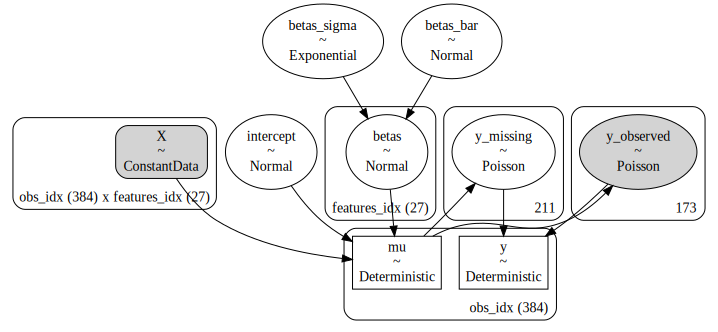

In [5]:
# check there are 27 features
func = models["pooled_intercept_pooled_covariate_model"]
m = func(prep_df, W)
pm.model_to_graphviz(m)

In [6]:
import time
import pandas as pd

# test that all the models can be sampled correctly
timings = {}
for name, func in models.items():
    print(name)
    model = func(prep_df, W)
    start = time.time()
    with model:
        trace = pm.sample(10, tune=0, cores=1, chains=1)
    end = time.time()
    timings[name] = end - start

Only 10 samples in chain.


varying_intercept_model


Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [intercept]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 0 seconds.
Only 10 samples in chain.


pooled_intercept_pooled_covariate_model


Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [intercept, betas_bar, betas_sigma, betas]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 0 seconds.
Only 10 samples in chain.


pooled_intercept_varying_covariate_model


Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [intercept, betas_bar, betas_sigma, betas]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 0 seconds.
Only 10 samples in chain.


varying_intercept_pooled_covariate_model


Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [intercept_bar, intercept_sigma, intercept, betas_bar, betas_sigma, betas]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 0 seconds.
Only 10 samples in chain.


varying_intercept_varying_covariate_model


Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [intercept_bar, intercept_sigma, intercept, betas_bar, betas_sigma, betas]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 0 seconds.
Only 10 samples in chain.


varying_intercept_car_model


Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [alpha, sigma_phi, phi, intercept_bar, intercept_sigma, intercept]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 0 seconds.
Only 10 samples in chain.


pooled_intercept_car_model


Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [alpha, sigma_phi, phi, intercept]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 0 seconds.
Only 10 samples in chain.


pooled_intercept_varying_covariate_car_model


Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [alpha, sigma_phi, phi, intercept, betas_bar, betas_sigma, betas]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 0 seconds.
Only 10 samples in chain.


varying_intercept_pooled_covariate_car_model


Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [alpha, sigma_phi, phi, intercept_bar, intercept_sigma, intercept, betas_bar, betas_sigma, betas]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 0 seconds.


varying_intercept_varying_covariate_car_model


Only 10 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [alpha, sigma_phi, phi, intercept_bar, intercept_sigma, intercept, betas_bar, betas_sigma, betas]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 0 seconds.


In [7]:
pd.DataFrame(timings, index=["timing"]).T

,timing
varying_intercept_model,2.922210
pooled_intercept_pooled_covariate_model,2.989084
pooled_intercept_varying_covariate_model,2.507622
varying_intercept_pooled_covariate_model,2.696123
varying_intercept_varying_covariate_model,2.834327
varying_intercept_car_model,5.082377
pooled_intercept_car_model,3.539340
pooled_intercept_varying_covariate_car_model,4.395907
varying_intercept_pooled_covariate_car_model,4.973153
varying_intercept_varying_covariate_car_model,4.767738


In [8]:
# now sample everything for real, and store the traces
timings = {}
traces = {}
for name, func in models.items():
    print(name)
    model = func(prep_df, W)
    start = time.time()
    with model:
        trace = pm.sample(1000, tune=1000, cores=16, target_accept=0.9)
    end = time.time()
    traces[name] = trace
    timings[name] = end - start

varying_intercept_model


Multiprocess sampling (16 chains in 16 jobs)
CompoundStep
>NUTS: [intercept]
>Metropolis: [y_missing]


Sampling 16 chains for 1_000 tune and 1_000 draw iterations (16_000 + 16_000 draws total) took 82 seconds.


pooled_intercept_pooled_covariate_model


Multiprocess sampling (16 chains in 16 jobs)
CompoundStep
>NUTS: [intercept, betas_bar, betas_sigma, betas]
>Metropolis: [y_missing]


Sampling 16 chains for 1_000 tune and 1_000 draw iterations (16_000 + 16_000 draws total) took 135 seconds.


pooled_intercept_varying_covariate_model


Multiprocess sampling (16 chains in 16 jobs)
CompoundStep
>NUTS: [intercept, betas_bar, betas_sigma, betas]
>Metropolis: [y_missing]


Sampling 16 chains for 1_000 tune and 1_000 draw iterations (16_000 + 16_000 draws total) took 181 seconds.


varying_intercept_pooled_covariate_model


Multiprocess sampling (16 chains in 16 jobs)
CompoundStep
>NUTS: [intercept_bar, intercept_sigma, intercept, betas_bar, betas_sigma, betas]
>Metropolis: [y_missing]


Sampling 16 chains for 1_000 tune and 1_000 draw iterations (16_000 + 16_000 draws total) took 148 seconds.


varying_intercept_varying_covariate_model


Multiprocess sampling (16 chains in 16 jobs)
CompoundStep
>NUTS: [intercept_bar, intercept_sigma, intercept, betas_bar, betas_sigma, betas]
>Metropolis: [y_missing]


Sampling 16 chains for 1_000 tune and 1_000 draw iterations (16_000 + 16_000 draws total) took 203 seconds.


varying_intercept_car_model


Multiprocess sampling (16 chains in 16 jobs)
CompoundStep
>NUTS: [alpha, sigma_phi, phi, intercept_bar, intercept_sigma, intercept]
>Metropolis: [y_missing]


Sampling 16 chains for 1_000 tune and 1_000 draw iterations (16_000 + 16_000 draws total) took 128 seconds.


pooled_intercept_car_model


Multiprocess sampling (16 chains in 16 jobs)
CompoundStep
>NUTS: [alpha, sigma_phi, phi, intercept]
>Metropolis: [y_missing]


Sampling 16 chains for 1_000 tune and 1_000 draw iterations (16_000 + 16_000 draws total) took 122 seconds.


pooled_intercept_varying_covariate_car_model


Multiprocess sampling (16 chains in 16 jobs)
CompoundStep
>NUTS: [alpha, sigma_phi, phi, intercept, betas_bar, betas_sigma, betas]
>Metropolis: [y_missing]


Sampling 16 chains for 1_000 tune and 1_000 draw iterations (16_000 + 16_000 draws total) took 398 seconds.


varying_intercept_pooled_covariate_car_model


Multiprocess sampling (16 chains in 16 jobs)
CompoundStep
>NUTS: [alpha, sigma_phi, phi, intercept_bar, intercept_sigma, intercept, betas_bar, betas_sigma, betas]
>Metropolis: [y_missing]


Sampling 16 chains for 1_000 tune and 1_000 draw iterations (16_000 + 16_000 draws total) took 335 seconds.


varying_intercept_varying_covariate_car_model


Multiprocess sampling (16 chains in 16 jobs)
CompoundStep
>NUTS: [alpha, sigma_phi, phi, intercept_bar, intercept_sigma, intercept, betas_bar, betas_sigma, betas]
>Metropolis: [y_missing]


Sampling 16 chains for 1_000 tune and 1_000 draw iterations (16_000 + 16_000 draws total) took 311 seconds.


In [12]:
ranking = az.compare(traces, ic="waic", scale="deviance")
ranking

,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
varying_intercept_varying_covariate_car_model,0,967.048270,108.067303,0.000000,7.222393e-01,29.640112,0.000000,True,deviance
pooled_intercept_varying_covariate_car_model,1,1237.931254,198.194530,270.882984,0.000000e+00,54.202141,44.130389,True,deviance
varying_intercept_pooled_covariate_car_model,2,1291.846002,160.712854,324.797732,2.004576e-01,129.089822,118.678589,True,deviance
varying_intercept_car_model,3,1296.859986,163.005070,329.811716,0.000000e+00,129.583780,119.229776,True,deviance
varying_intercept_varying_covariate_model,4,1748.387796,307.339441,781.339526,5.923038e-02,155.758518,149.823480,True,deviance
pooled_intercept_varying_covariate_model,5,1986.657713,376.320468,1019.609443,0.000000e+00,182.031455,175.317921,True,deviance
varying_intercept_pooled_covariate_model,6,2094.705183,292.578253,1127.656913,1.807268e-02,270.445861,261.435913,True,deviance
pooled_intercept_car_model,7,3384.611096,634.203830,2417.562826,7.055522e-12,430.550607,418.981752,True,deviance
pooled_intercept_pooled_covariate_model,8,3896.905073,631.799050,2929.856803,1.754534e-11,536.617782,526.202263,True,deviance
varying_intercept_model,9,4021.915891,115.954685,3054.867621,7.259526e-12,799.544340,792.659483,True,deviance


In [13]:
formatted = (
    ranking.iloc[:, :-2]
    .round(2)
    .rename(columns={"index": "model name"})
    .drop(columns=["weight"])
)
formatted

,rank,elpd_waic,p_waic,elpd_diff,se,dse
varying_intercept_varying_covariate_car_model,0,967.05,108.07,0.00,29.64,0.00
pooled_intercept_varying_covariate_car_model,1,1237.93,198.19,270.88,54.20,44.13
varying_intercept_pooled_covariate_car_model,2,1291.85,160.71,324.80,129.09,118.68
varying_intercept_car_model,3,1296.86,163.01,329.81,129.58,119.23
varying_intercept_varying_covariate_model,4,1748.39,307.34,781.34,155.76,149.82
pooled_intercept_varying_covariate_model,5,1986.66,376.32,1019.61,182.03,175.32
varying_intercept_pooled_covariate_model,6,2094.71,292.58,1127.66,270.45,261.44
pooled_intercept_car_model,7,3384.61,634.20,2417.56,430.55,418.98
pooled_intercept_pooled_covariate_model,8,3896.91,631.80,2929.86,536.62,526.20
varying_intercept_model,9,4021.92,115.95,3054.87,799.54,792.66


In [17]:
timing_df = pd.DataFrame(timings, index=["timing"]).T
timing_df

,timing
varying_intercept_model,96.591521
pooled_intercept_pooled_covariate_model,153.059315
pooled_intercept_varying_covariate_model,200.544068
varying_intercept_pooled_covariate_model,167.806000
varying_intercept_varying_covariate_model,224.089703
varying_intercept_car_model,154.537704
pooled_intercept_car_model,146.181159
pooled_intercept_varying_covariate_car_model,426.813969
varying_intercept_pooled_covariate_car_model,365.789251
varying_intercept_varying_covariate_car_model,341.940449


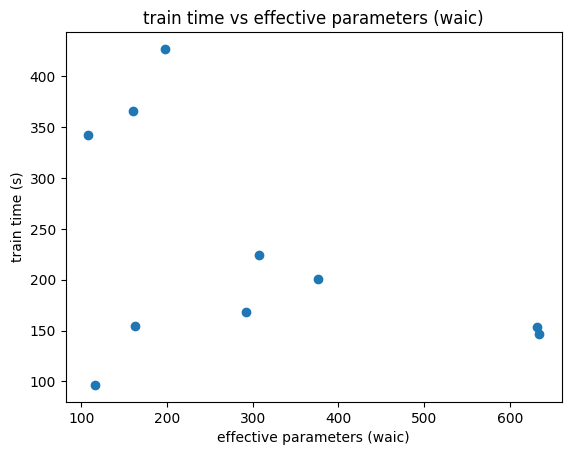

In [24]:
import matplotlib.pyplot as plt

joined = timing_df.join(formatted)

plt.title("train time vs effective parameters (waic)")
plt.scatter(joined.p_waic, joined.timing)
plt.xlabel("effective parameters (waic)")
plt.ylabel("train time (s)")
plt.show()

In [14]:
print(formatted.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  rank &  elpd\_waic &  p\_waic &  elpd\_diff &      se &     dse \\
\midrule
varying\_intercept\_varying\_covariate\_car\_model &     0 &     967.05 &  108.07 &       0.00 &   29.64 &    0.00 \\
pooled\_intercept\_varying\_covariate\_car\_model  &     1 &    1237.93 &  198.19 &     270.88 &   54.20 &   44.13 \\
varying\_intercept\_pooled\_covariate\_car\_model  &     2 &    1291.85 &  160.71 &     324.80 &  129.09 &  118.68 \\
varying\_intercept\_car\_model                   &     3 &    1296.86 &  163.01 &     329.81 &  129.58 &  119.23 \\
varying\_intercept\_varying\_covariate\_model     &     4 &    1748.39 &  307.34 &     781.34 &  155.76 &  149.82 \\
pooled\_intercept\_varying\_covariate\_model      &     5 &    1986.66 &  376.32 &    1019.61 &  182.03 &  175.32 \\
varying\_intercept\_pooled\_covariate\_model      &     6 &    2094.71 &  292.58 &    1127.66 &  270.45 &  261.44 \\
pooled\_intercept\_car\_model                    &     7 &    3

C:\Users\acmiy\AppData\Local\Temp\ipykernel_49760\2487536844.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(formatted.to_latex())
